Задания 13.12

#Практика

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Определяем функции
def f1(x, a0, a1, a2):
    return a2 * x**2 + a1 * x + a0

def f2(x, a0, a1, a2):
    return np.exp(a2 * x) + a1 * x + a0

# Определяем границы для коэффициентов
a2_f1_bounds = (1.0, 1.1)
a1_f1_bounds = (-0.1, 0.1)
a0_f1_bounds = (-0.1, 0.1)

a2_f2_bounds = (1.0, 1.1)
a1_f2_bounds = (1.9, 2.1)
a0_f2_bounds = (1.1, 1.2)

# Задаваем диапазон x для поиска корней
x_values = np.linspace(-2, 2, 100)

In [2]:
# Находим корни уравнения f1
def find_root_f1(a0, a1, a2):
    initial_guess = 0  # Начальное приближение
    root = fsolve(f1, initial_guess, args=(a0, a1, a2))
    return root[0]

# Приведение к формату для вычислений
roots_f1 = []
for a2 in np.linspace(*a2_f1_bounds, 5):
    for a1 in np.linspace(*a1_f1_bounds, 5):
        for a0 in np.linspace(*a0_f1_bounds, 5):
            root = find_root_f1(a0, a1, a2)
            roots_f1.append((a0, a1, a2, root))

<ipython-input-2-25fc9d07f1f7>:4: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  root = fsolve(f1, initial_guess, args=(a0, a1, a2))
<ipython-input-2-25fc9d07f1f7>:4: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  root = fsolve(f1, initial_guess, args=(a0, a1, a2))


In [3]:
# Находим корни уравнения f2
def find_root_f2(a0, a1, a2):
    initial_guess = 0  # Начальное приближение
    root = fsolve(f2, initial_guess, args=(a0, a1, a2))
    return root[0]

# Приведение к формату для вычислений
roots_f2 = []
for a2 in np.linspace(*a2_f2_bounds, 5):
    for a1 in np.linspace(*a1_f2_bounds, 5):
        for a0 in np.linspace(*a0_f2_bounds, 5):
            root = find_root_f2(a0, a1, a2)
            roots_f2.append((a0, a1, a2, root))

In [4]:
# Метод Монте-Карло для оценки погрешности
def monte_carlo_method(func, a0_bounds, a1_bounds, a2_bounds, n=1000):
    roots = []
    for _ in range(n):
        a0 = np.random.uniform(*a0_bounds)
        a1 = np.random.uniform(*a1_bounds)
        a2 = np.random.uniform(*a2_bounds)
        root = fsolve(func, 0, args=(a0, a1, a2))[0]
        roots.append(root)
    return roots

# Оценка погрешности для f1 и f2
monte_carlo_roots_f1 = monte_carlo_method(f1, a0_f1_bounds, a1_f1_bounds, a2_f1_bounds)
monte_carlo_roots_f2 = monte_carlo_method(f2, a0_f2_bounds, a1_f2_bounds, a2_f2_bounds)

# Вычисляем погрешность
error_f1 = np.std(monte_carlo_roots_f1)
error_f2 = np.std(monte_carlo_roots_f2)

print(f"Погрешность корней для f1: {error_f1}")
print(f"Погрешность корней для f2: {error_f2}")

<ipython-input-4-c2f083db2776>:8: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  root = fsolve(func, 0, args=(a0, a1, a2))[0]
<ipython-input-4-c2f083db2776>:8: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  root = fsolve(func, 0, args=(a0, a1, a2))[0]


Погрешность корней для f1: 0.14097641729090632
Погрешность корней для f2: 0.02241426543859994


In [5]:
def analytical_error(a0, a1, a2, root):
    # Например, берем первую производную
    # Считаем производные для f1 и f2
    df1_da0 = 1
    df1_da1 = root
    df1_da2 = root**2

    df2_da0 = 1
    df2_da1 = root
    df2_da2 = np.exp(a2 * root) * root

    # Общая погрешность
    error_f1 = np.sqrt((df1_da0 * 0.1)**2 + (df1_da1 * 0.2)**2 + (df1_da2 * 0.1)**2)  # Предполагаем, что погрешность a1 ~ 0.2
    error_f2 = np.sqrt((df2_da0 * 0.1)**2 + (df2_da1 * 0.2)**2 + (df2_da2 * 0.1)**2)

    return error_f1, error_f2

# Пример вычислений ошибок для любого найденного корня
a0_example = 0.05
a1_example = 0.05
a2_example = 1.05
root_example_f1 = find_root_f1(a0_example, a1_example, a2_example)
root_example_f2 = find_root_f2(a0_example, a1_example, a2_example)

error_f1_analytical, error_f2_analytical = analytical_error(a0_example, a1_example, a2_example, root_example_f1)
print(f"Аналитическая погрешность f1: {error_f1_analytical}")
print(f"Аналитическая погрешность f2: {error_f2_analytical}")

Аналитическая погрешность f1: 0.10011350768155758
Аналитическая погрешность f2: 0.1001404607295054


<ipython-input-2-25fc9d07f1f7>:4: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  root = fsolve(f1, initial_guess, args=(a0, a1, a2))


###Вывод:

- Метод Монте-Карло

Погрешность корней для f1: 0.14097641729090632

Погрешность корней для f2: 0.02241426543859994

- Аналитическая погрешность

Аналитическая погрешность f1: 0.10011350768155758

Аналитическая погрешность f2: 0.1001404607295054

Итог:

Для уравнения 1 - лучше аналитическая погрешность

Для уравнения 2 - лучше метод Монте-Карло


#Домашнее задание


In [6]:
# Функция для квадратного уравнения
def quadratic_eq(x, a0, a1, a2):
    return a2 * x**2 + a1 * x + a0

# Функция для экспоненциального уравнения
def exponential_eq(x, a0, a1, a2):
    return np.exp(a2 * x) + a1 * x + a0

In [7]:
def monte_carlo_method(a0_bounds, a1_bounds, a2_bounds, num_samples=1000):
    roots = []
    for _ in range(num_samples):
        # Генерируем случайные коэффициенты в заданных пределах
        a0 = np.random.uniform(*a0_bounds)
        a1 = np.random.uniform(*a1_bounds)
        a2 = np.random.uniform(*a2_bounds)

        # Находим корень
        root = fsolve(quadratic_eq, 0, args=(a0, a1, a2))
        roots.append((a0, a1, a2, root[0]))

    return np.array(roots)

In [8]:
def analytical_error(roots):
    # Вычисляем среднее значение корней
    mean_root = np.mean(roots[:, 3])

    # Вычисляем погрешность
    error = np.std(roots[:, 3])

    return mean_root, error

<ipython-input-7-ae3726afaa8c>:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  root = fsolve(quadratic_eq, 0, args=(a0, a1, a2))
<ipython-input-7-ae3726afaa8c>:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  root = fsolve(quadratic_eq, 0, args=(a0, a1, a2))


Средний корень: 0.005288735185953067
Погрешность: 0.1434404348276175


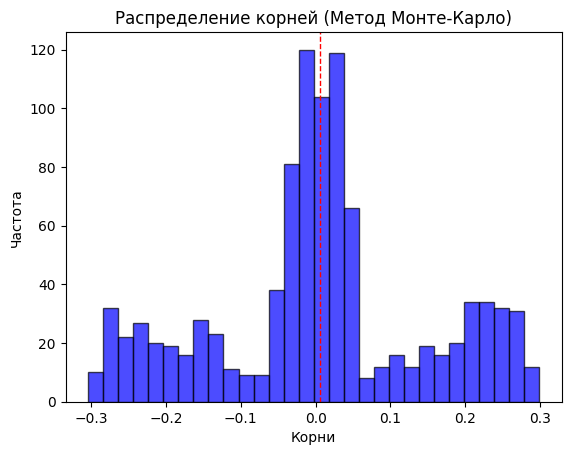

In [9]:
# Определим границы для коэффициентов
a0_bounds = (-0.1, 0.1)
a1_bounds = (-0.1, 0.1)
a2_bounds = (1.0, 1.1)

# Применим метод Монте-Карло
monte_carlo_roots = monte_carlo_method(a0_bounds, a1_bounds, a2_bounds, 1000)

# Вычисляем аналитическую погрешность
mean_root, error = analytical_error(monte_carlo_roots)

# Выводим результаты
print(f"Средний корень: {mean_root}")
print(f"Погрешность: {error}")

# Визуализация результатов
plt.hist(monte_carlo_roots[:, 3], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(mean_root, color='red', linestyle='dashed', linewidth=1)
plt.title('Распределение корней (Метод Монте-Карло)')
plt.xlabel('Корни')
plt.ylabel('Частота')
plt.show()